# Vehicle Price Insights: Uncovering Key Factors

by Sasha Fridman, March 2024

<hr style="border: none; border-top: 2px solid black;">

<span style="font-size: 1.5em;">Table of Contents</span>

1. [📖 Project Description](#project-description)
2. [📚 Loading Data and Libraries](#loading-data-and-libraries)
3. [🔍 Data Exploration](#data-exploration)
4. [🛠️ Treating Missing Values](#treating-missing-values)
5. [🛠️ Fixing Data Types](#fixing-data-types)
6. [✨ Enriching Data](#enriching-data)
7. [🔍 Checking Cleaned Data](#checking-cleaned-data)
8. [🔍 Studying Parameters](#studying-parameters)
9. [🛠️ Treating Outliers](#treating-outliers)
10. [🔍 Studying Parameters Without Outliers](#studying-parameters-without-outliers)
11. [💲🚗 Average Prices by Vehicle Type](#average-prices-by-vehicle-type)
12. [💲🎨 The Other Price Factors](#the-other-price-factors)
13. [📝 General Conclusions](#general-conclusions)

***

## 📖 Project Description <a name="project-description"></a>

In our role at Crankshaft List, we're entrusted with carefully analyzing the wealth of data accumulated from the many daily vehicle advertisements on our platform.  
**Our goal is to thoroughly examine the data gathered over the past few years, aiming to uncover the key factors that influence vehicle pricing.**

## 📚 Loading Data and Libraries <a name="loading-data-and-libraries"></a>

In [1]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [2]:
# loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.1) #changing font size
import sidetable
import matplotlib.pyplot as plt

# printing more than 1 output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# load the data file into a dataframe
try:
    data = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\3 Exploratory Data Analysis (EDA)\vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

## 🔍 Data Exploration  <a name="data-exploration"></a>

### Description of the data

File: `vehicles_us.csv` includes the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

###  Initial Data Inspection

In [4]:
# print the general/summary information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# print a sample of data
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9289,6900,2012.0,ford expedition,excellent,8.0,gas,NaN,automatic,SUV,silver,1.0,2019-03-28,73
48458,5500,2011.0,kia sorento,excellent,4.0,gas,168394.0,automatic,SUV,red,1.0,2018-08-05,8
42221,18000,2011.0,ford f250,fair,NaN,gas,84000.0,automatic,truck,white,1.0,2018-11-08,28
5998,3500,2005.0,honda odyssey,good,6.0,gas,211808.0,automatic,mini-van,black,NaN,2018-09-11,60
46535,15950,2013.0,ford f-150,good,8.0,gas,NaN,automatic,truck,white,1.0,2018-09-08,17
37709,17498,2009.0,jeep wrangler,good,6.0,gas,131178.0,other,SUV,orange,1.0,2019-03-06,15
39143,7910,2010.0,chrysler town & country,excellent,6.0,gas,103065.0,automatic,mini-van,red,NaN,2019-01-14,3
44270,14000,2008.0,gmc sierra,excellent,8.0,gas,101937.0,automatic,pickup,silver,NaN,2018-10-05,24
1380,15995,2013.0,bmw x5,excellent,6.0,gas,87338.0,automatic,SUV,grey,1.0,2019-03-10,15
9028,10900,2011.0,ford f-150,good,8.0,gas,NaN,other,truck,red,NaN,2018-10-02,21


What we see in the information above:
- `model_year`, `cylinders` and `odometer` field are of float type and `date_posted` - object type. That's worth fixing.
- **missing values in `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` columns should be addressed as well**.  
The highest share of missing values is in `is_4wd` field. *Probably this parameter seems in not very important/known for those who posted those ads*

In [6]:
# let's see the main descriptive statistics of data
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


The main descriptive statistics shows us following:
- **minimum price = 1 seems unrealistic** (sell a car for that kind of money is not worth the time for placing the ad). *Later on we'll check the share of ads with such price (and other unrealistically low prices) and decide how to address them.*
- **values in `is_4wd` field seem to be of boolean kind**, where 1 means - 4wd-type and 0 - otherwise not.
- **0 values in odometer field are worth further investigation** (such small figure looks very unrealistic)

In [7]:
# Let's check if we have any duplicates in our data.

print('Number of duplicates:', data.duplicated().sum(), 
      '\nShare of duplicates:', round(data.duplicated().sum()/len(data)*100, 2), '%')
print('-------')
print(data[data.duplicated()].head(10))

Number of duplicates: 0 
Share of duplicates: 0.0 %
-------
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


**No duplicated rows in this dataset revealed**.

Let's check the unique values of all categorical characteristics to see whether they consist of unobvious duplicates where should be none.

In [8]:
for characteristic in data: # going through all column names
    if data[characteristic].dtype=='object': #  if a column type is 'object'       
        print(characteristic, ': ', data[characteristic].unique()) # print its unique values
        print(' ')

model :  ['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet c

We can see some **unobvious duplicates in the models names**, like: 'ford f250 super duty' and 'ford f-250 sd'.  
It's easy to check that 'sd' in fact means 'super duty'

In [9]:
# let's sort the models to help check if there are any other duplicates 
sorted(data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

It seems the issue is only with Ford f-250 sd model that we had found earlier and with Ford f350 - the same thing. 

In [10]:
# let's fix 'ford f250 super duty' names
data['model'] = data['model'].str.replace('super duty', 'sd')
sorted(data['model'].unique())  

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 sd',
 'ford f350',
 'ford f350 sd',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford mustang gt coupe 2d',
 'ford ranger',

Now all is fine with the names of Ford models. 

### Conclusions

By use of info(), describe() and sample() we checked data types, the presence of missed values in data, and how ads in fact look like. 

We've found the following issues and are going to address them in the next steps:  
- `model_year`, `cylinders`, and `odometer` fields are of float type and `date_posted` - object type. We'll make them integer and DateTime -respectively. 
- values in `is_4wd` field seem to be of a boolean kind, where 1 means - 4wd-type and 0 - otherwise not. We'll fix the data basing on this logic.
- missing values in `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`. We are going to find the best replacements for them taking into account the meaning of each field.
- minimum price = 1 seems unrealistic, and 0 values in the odometer field - as well. We'll investigate this data more precisely and decide how to address it.
- by use of duplicated() method we checked whether there are duplicated rows in the data and found out that there are none. 
- by use of the unique() method we checked whether there are unobvious duplicates in the object type field such as model or type. 
- we found and fixed some minor duplicates in the names of models (caused by the different spelling of some identical Ford models)

## 🛠️ Treating Missing Values <a name="treating-missing-values"></a>

### Observations of Missing Values and their Correlations

In [11]:
# let's check missing values
data.stb.missing(style=True)

,missing,total,percent
is_4wd,"25,953","51,525",50.37%
paint_color,"9,267","51,525",17.99%
odometer,"7,892","51,525",15.32%
cylinders,"5,260","51,525",10.21%
model_year,"3,619","51,525",7.02%
price,0,"51,525",0.00%
model,0,"51,525",0.00%
condition,0,"51,525",0.00%
fuel,0,"51,525",0.00%
transmission,0,"51,525",0.00%


**The missing values of parameters don't seem to be interconnected at first glance**, but let's take a closer look just in case.  
We'll perform that by use of nullity correlation matrix and Pandas corr() method.

In [12]:
#checking correlation between missing values of the different parameters
data[['is_4wd','paint_color','odometer','cylinders','model_year']].isna().corr().round(2)

,is_4wd,paint_color,odometer,cylinders,model_year
is_4wd,1.0,-0.0,0.0,0.0,-0.0
paint_color,-0.0,1.0,0.0,0.0,0.0
odometer,0.0,0.0,1.0,0.0,-0.0
cylinders,0.0,0.0,0.0,1.0,-0.0
model_year,-0.0,0.0,-0.0,-0.0,1.0


**The correlations between missed values in different fields are very low in fact** (mostly the numbers are lower than 0.001).

### Fixing the missed values in the `is_4wd` field

In [13]:
# as we decided earlier, is_4wd is of boolean kind and so we'll transform Nan values into 0.
data['is_4wd'] = data['is_4wd'].fillna(value=0)
data['is_4wd'].value_counts() 

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

The result is as expected - no Nan values anymore, zeros instead (which means non-4wd type of cars) 


In [14]:
# fixing the missed values in the paint_color field
# let's check the values in this field
data['paint_color'].value_counts()

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [15]:
# it seems to be impossible to guess what color was supposed to be in the place of a missed one.
# so we'll just replace the missed values with 'unknown'
data['paint_color'] = data['paint_color'].fillna(value='unknown')
data['paint_color'].value_counts()

paint_color
white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: count, dtype: int64

All is fine with `paint_color` field now - unknown instead of None


###  Fixing the missed values in the `odometer` field
Odometer values for sure must correlate with other categories.  
To simplify the task we'll proceed with checking correlation with the other numeric categories only. *Otherwise we would need to convert the non-numeric columns into a numeric format by high effort-consuming encoding categorical variables. Upon reviewing the parameters, it's evident that the strongest correlation is likely to be with numeric variables such as model year or price.*

In [16]:
# building correlation matrix
data.select_dtypes(include='number').corr().round(2)

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.00,0.43,0.30,-0.42,0.32,-0.00
model_year,0.43,1.00,-0.15,-0.47,0.04,-0.01
cylinders,0.30,-0.15,1.00,0.09,0.41,0.01
odometer,-0.42,-0.47,0.09,1.00,0.04,0.00
is_4wd,0.32,0.04,0.41,0.04,1.00,0.00
days_listed,-0.00,-0.01,0.01,0.00,0.00,1.00


In the table above we can see that the strongest correlations of `odometer` values are with `price` and `model_year` fields. De facto they are not very high (could be treated from weak to moderate), but it's the best we have. So let's use these categories for fulfilling the missed odometer values. 

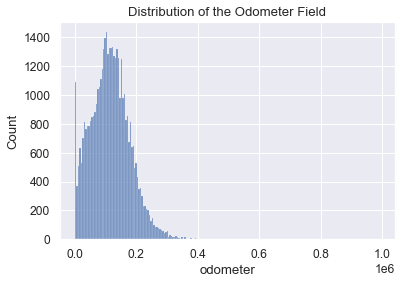

In [17]:
# let's check the distribution of 'odometer' column
sns.histplot(data['odometer']).set_title('Distribution of the Odometer Field');

On the histplot above, we can see that the **distribution is slightly skewed and possibly contains outliers** (e.g., zero value). So let's use the ***median instead of the mean to fill in the NaNs** as it would better represent *typical* odometer value.

In [18]:
# filling missed values by use of 'transform' function
data['odometer'] = data['odometer'].fillna(data.groupby(['price','model_year'])['odometer'].transform('median'))
data['odometer'].isna().mean() * 100 # checking %of missed

2.938379427462397

We reduced `odometer` field missed values from 15.3% to 2.9%

In [19]:
# let's fix what left by a bit less precise grouping on model_year field only
data['odometer'] = data['odometer'].fillna(data.groupby(['model_year'])['odometer'].transform('median'))
data['odometer'].isna().mean() * 100 # checking %of missed values

1.067442988840369

We reduced `odometer` field missed values from 2.9% to 1.1%  
Let's fix what left by use of grouping on the `model` field only. *This simplification won't corrupt the whole dataset, since the amount of data we change represent its insignificant share.*

In [20]:
# let's fix what left by use of median odometer value
data['odometer'] = data['odometer'].fillna(data.groupby(['model'])['odometer'].transform('median'))
data['odometer'].isna().mean() * 100 #%of missed values

0.0

All is fine with `odometer` field now - no missed values anymore.

###  Fixing the missed values in the `cylinders` field 
In the correlation matrix above we can see that the highest correlations of cylinders values are with `is_4wd`and `price` fields. They are not very high in fact (can be treated from weak to moderate), but it's the best we have. 

In [21]:
# filling missed values using 'transform' function
data['cylinders'] = data['cylinders'].fillna(data.groupby(['is_4wd','price'])['cylinders'].transform('median'))
data['cylinders'].isna().mean() * 100 #%of missed values

0.4444444444444444

From 10.2% to 0.4% of missed values in `cylinders` field by now.

In [22]:
# let's fix what left by use of grouping on the is_4wd field only. 
data['cylinders'] = data['cylinders'].fillna(data.groupby(['is_4wd'])['cylinders'].transform('median'))
data['cylinders'].isna().mean() * 100 #%of missed values

0.0

All is fine with the `cylinders` field now - no missed values anymore.

### Fixing the missed values in the `model_year` field 
In the correlation matrix above we can see that the highest correlations of `model_year` values are with `odometer` and `price` fields. They are very high in fact (can be treated from weak to moderate), but it's the best we have. 


In [23]:
# filling missed values using 'transform' function
data['model_year'] = data['model_year'].fillna(data.groupby(['odometer','price'])['model_year'].transform('median'))
round(data['model_year'].isna().mean() * 100, 1) #%of missed values

4.5

From 7.0% to 4.5% of missed values in model_year field by now

In [24]:
# let's fix what left by use of grouping on the odometer field only.
data['model_year'] = data['model_year'].fillna(data.groupby(['odometer'])['model_year'].transform('median'))
round(data['model_year'].isna().mean() * 100, 1) #%of missed values

2.0

From 2% of missed values in model_year field by now

In [25]:
# let's fix what left by use of grouping on the model field only.
data['model_year'] = data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median'))
round(data['model_year'].isna().mean() * 100, 1) #%of missed values

0.0

Finally all is fine with the `model_year` field - no missed values anymore.

## 🛠️ Fixing Data Types <a name="enriching-data"></a>

In [26]:
# let's fix data types as we mention above
data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['odometer'] = data['odometer'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('int')
data['date_posted'] = pd.to_datetime(data['date_posted'])

# checking the results
data.info()
data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int64(2), object(6)
memory usage: 4.3+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10158,10000,2011,chrysler 200,excellent,6,gas,76000,automatic,coupe,black,0,2018-05-24,21
122,4500,2012,chevrolet impala,excellent,6,gas,145000,automatic,sedan,white,0,2018-10-10,38
50849,11800,2008,ford f-250 sd,good,8,gas,104470,automatic,pickup,brown,1,2018-06-21,11


In [27]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000
mean,12132.464920,2009.703464,6.125182,115465.587870,0.496303,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.00000
25%,5000.000000,2006.000000,4.000000,72059.000000,0.000000,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.000000,114000.000000,0.000000,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,153592.000000,1.000000,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.00000
std,10040.803015,6.492297,1.644678,62913.540688,0.499991,NaN,28.20427


**Finally the data types of all the fields are OK and the data output looks fine as well**. 

## ✨ Enriching Data <a name="Project-Description"></a>

Our further analysis would be easier if we had separate fields for year, month, and weekdays of posting, as well as age of the car when the ad was posted.

Firstly having data types fixed we can verify data coverage over time.

In [28]:
data['date_posted'].max()-data['date_posted'].min()

Timedelta('353 days 00:00:00')

**Data from our study spans almost a year.**

### Adding Year, Month, and Week of Posted Advert Fields

In [29]:
# adding datetime values for adds
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year
data['month_posted'] = pd.DatetimeIndex(data['date_posted']).month
data['weekday_posted'] = pd.DatetimeIndex(data['date_posted']).weekday

### Adding Vehicle's Age field
Since we only have the years of models, **the calculation error in the `age_posted` field could be up to 1 year**. If we knew the months of model production, we could make the calculation of a car's age more precise. We should bear in mind this aspect, as we will likely encounter **cases like zero values in the car age field when the car is sold the same year it was produced**. Additionally, a 2-month-old car could have 1 year as the age value (e.g., the car was produced in Dec 2018 ('`model_year`' field) and sold in Jan 2019 ('`date_posted`' field)).


In [30]:
# adding the vehicle's age field
data['age_posted'] = data['year_posted'] - data['model_year']

In [31]:
# let's check the enriched data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int32         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       51525 non-null  int32         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  int32         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  int32         
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  year_posted     51525 non-null  int32         
 14  month_posted    51525 non-null  int32         
 15  we

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.703464,6.125182,115465.587870,0.496303,2018-10-25 01:57:46.270742528,39.55476,2018.307462,6.628491,3.005434,8.603998
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.00000,2018.000000,1.000000,0.000000,-1.000000
25%,5000.000000,2006.000000,4.000000,72059.000000,0.000000,2018-07-29 00:00:00,19.00000,2018.000000,3.000000,1.000000,4.000000
50%,9000.000000,2011.000000,6.000000,114000.000000,0.000000,2018-10-25 00:00:00,33.00000,2018.000000,7.000000,3.000000,8.000000
75%,16839.000000,2014.000000,8.000000,153592.000000,1.000000,2019-01-21 00:00:00,53.00000,2019.000000,10.000000,5.000000,12.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.00000,2019.000000,12.000000,6.000000,110.000000
std,10040.803015,6.492297,1.644678,62913.540688,0.499991,NaN,28.20427,0.461447,3.474134,1.997759,6.504634


In [32]:
data['date_posted'].max()-data['date_posted'].min()

Timedelta('353 days 00:00:00')

Everything looks fine now. But there are some **strange figures in the age_posted field like -1 and 110 years.** 

In [33]:
# let's investigate a bit these strange figures in the age_posted field
data[data['age_posted']==-1]
data[data['age_posted']==110]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted
2976,287,2019,chevrolet impala,like new,6,gas,36147,automatic,sedan,unknown,0,2018-08-09,64,2018,8,3,-1
46182,24100,2019,chevrolet camaro lt coupe 2d,good,6,gas,18755,other,coupe,unknown,0,2018-08-06,45,2018,8,0,-1
48503,21800,2019,nissan frontier crew cab sv,good,6,gas,11745,other,pickup,white,0,2018-10-25,86,2018,10,3,-1


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted
33906,12995,1908,gmc yukon,good,8,gas,169328,automatic,SUV,black,0,2018-07-06,34,2018,7,4,110
33907,12995,1908,cadillac escalade,excellent,8,gas,169328,automatic,SUV,white,0,2018-06-24,25,2018,6,6,110


110 years seem to be ok - taking in account names of models. -1 age_posted value seem to be caused by mistake in the model_year field.

Since these data don't seem to make a difference in our further investigations, let's save time for ongoing work and leave them as they are. In any case, we can address them later on if needed. Furthermore, these data must be treated as outliers in further steps of the Project, so thus we won't corrupt the data.

### Adding Vehicle's Average Mileage per Year Field
Since we only know the model year (not the month of production or start of use), we can use a year of posting in calculations.

In [34]:
# let's write a function that calculates the mileage per year. 

def mileage_per_year_calc(row):
    
    """
    The function returns: 
        - odometer value if the age_poset value = 0
        - (odometer value) / (age_posted value) in case age_posted value is not 0        
    Thus we would avoid mistake we would face in case of age_posted value of 0    
    """    

    if row['age_posted']==0:
        return row['odometer']
    else:
        return row['odometer'] / row['age_posted']    

In [35]:
# applying the 'mileage_per_year_calc' function
data['mileage_per_year'] = data.apply(mileage_per_year_calc, axis = 1)
data['mileage_per_year'].describe() #checking the result

count     51525.000000
mean      17853.304815
std       12885.899409
min      -36147.000000
25%       10812.500000
50%       15050.000000
75%       21249.200000
max      373200.000000
Name: mileage_per_year, dtype: float64

In [36]:
data[data['mileage_per_year']==data['mileage_per_year'].min()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year
2976,287,2019,chevrolet impala,like new,6,gas,36147,automatic,sedan,unknown,0,2018-08-09,64,2018,8,3,-1,-36147.0


`age_posted` value "-1" still disturbs and makes the data less clear. let's finally fix it. 
We'll do that by assigning the `year_posted` values to `the model_year` values in the ads where the `age_posted` values =-1 and refreshing `age_posted` field calculation based on the updated values.

In [37]:
data.loc[2976, 'model_year'] = data.loc[2976, 'year_posted']
data.loc[46182, 'model_year'] = data.loc[46182, 'year_posted']
data['age_posted'] = data['year_posted'] - data['model_year']

In [38]:
# let's apply the 'mileage_per_year_calc' function ones again after fixing the -1 values
data['mileage_per_year'] = data.apply(mileage_per_year_calc, axis = 1)

#checking the result
data.info()
data['mileage_per_year'].describe()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int32         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int32         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int32         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  int32         
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_posted       51525 non-null  int32         
 14  month_posted      5152

count     51525.000000
mean      17855.435897
std       12882.946241
min      -11745.000000
25%       10812.500000
50%       15050.083333
75%       21249.333333
max      373200.000000
Name: mileage_per_year, dtype: float64

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year
42042,27500,2017,ram 1500,good,8,gas,30394,automatic,truck,red,1,2019-02-22,48,2019,2,4,2,15197.000000
28870,7750,2016,ford focus,excellent,4,gas,88000,automatic,sedan,silver,0,2018-11-30,12,2018,11,4,2,44000.000000
25786,6995,2011,acura tl,good,6,gas,181865,automatic,sedan,unknown,0,2018-07-23,47,2018,7,0,7,25980.714286
49510,20500,2014,toyota 4runner,good,6,gas,183000,automatic,SUV,unknown,1,2019-01-17,12,2019,1,3,5,36600.000000
28139,3500,2003,ford explorer,fair,6,gas,163000,automatic,SUV,unknown,1,2019-03-19,16,2019,3,1,16,10187.500000


In [39]:
# finally all is fine, let's just turn the data format of mileage_per_year field into the integer type
data['mileage_per_year'] = data['mileage_per_year'].astype('int')
data['mileage_per_year'].dtype 

dtype('int32')

`mileage_per_year` field is finally fine.

In [40]:
# let's replace the qualitative values of the condition field by their quantitative analogs
# we'll do that by creating the dictionary and replacing the values by use of lambda function
# let's see unique values first
data['condition'].value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [41]:
# creating a dictionary
condition_dict={
    'new':6,
    'like new':5,
    'excellent':4,
    'good':3,
    'fair':2,
    'salvage':1
}

In [42]:
# checking the dictionary
condition_dict.keys()
condition_dict.values()
condition_dict.get('excellent')

dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])

dict_values([6, 5, 4, 3, 2, 1])

4

### Creating `condition_calc` Field  

We'll create this field  by lambda function, which will return quantitative analogs of qualitative values of the condition field.

In [43]:
# creating the 'condition_calc' field
data['condition_calc']=data['condition'].apply(lambda x: condition_dict[x])

In [44]:
# checking the 'condition_calc' field
data['condition_calc'].value_counts()
data.sample(3)

condition_calc
4    24773
3    20145
5     4742
2     1607
6      143
1      115
Name: count, dtype: int64

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
15965,23700,2018,nissan frontier crew cab sv,good,6,gas,12901,other,pickup,black,1,2018-06-30,33,2018,6,5,0,12901,3
14023,12500,2011,toyota tundra,good,8,gas,157500,automatic,pickup,grey,1,2018-09-05,57,2018,9,2,7,22500,3
48308,10995,2016,dodge grand caravan,excellent,6,gas,62655,automatic,mini-van,white,0,2018-08-24,47,2018,8,4,2,31327,4


All is fine with the new `condition_calc` field and we can better use this characteristic in the further analysis.

## 🔍 Checking Cleaned Data <a name="checking-cleaned-data"></a>

### Overview of Cleaned Data

In [45]:
# print the general/summary information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int32         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int32         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int32         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  int32         
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_posted       51525 non-null  int32         
 14  month_posted      5152

In [46]:
# print a sample of data
data.sample(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
13774,5595,2011,ford taurus,excellent,6,gas,174000,automatic,sedan,grey,0,2019-01-08,39,2019,1,1,8,21750,4
45214,10500,2007,toyota tundra,excellent,8,gas,135500,automatic,pickup,unknown,0,2018-10-30,18,2018,10,1,11,12318,4
2260,7995,2014,ford f150,excellent,4,gas,145000,automatic,pickup,white,0,2019-03-09,23,2019,3,5,5,29000,4


### Intermediate Conclusions
By now we've done following data transformations that would be handy later on in the project: 
- added several new fields connected with posting date (`year_posted`, `month_posted`, `weekday_posted`, `month_posted`)
- calculated `mileage_per_year` characteristic 
- calculated `condition_calc` field representing qualitative value of the condition characteristic
- found and fixed some minor duplicates in models names
- fixed all data types

## 🔍 Studying Parameters <a name="studying-parameters"></a>

### 📐 Creating a Unified Study Approach Function

The core parameters are following:
- **Price**
- **The vehicle's age when the ad was placed**
- **Mileage**
- **Mileage per year**
- **Number of cylinders**
- **Condition**

**Since we need to study several parameters with a more or less unified approach, it's reasonable to create a universal but adjustable tool for this purpose. This tool would be a function** that would take our parameters as input and as output - present the following investigations.

For data visualization purposes:
- several histograms with different bins number (for versatile displaying of the data)
- two boxplots, the first displaying data with outliers, the second - without outliers

For data "cleaning" purposes:
- main descriptive statistics of a parameter that we study 
- upper and lower limits of outliers

As input this function will take:
- data frame of investigating parameter
- parameter that we study
- xlimit of a histogram (it would be handy to add this function parameter to make histograms more demonstrative)
- bins (numbers of bins of a histogram - plotted for each) 
- whether to show information about outliers (we won't display this information when reanalyzing data after cleaning out outliers)

**For defining the limits of outliers we would use "1.5\*IQR aproach" (whiskers of boxplot).** But we won't do it blindly, e.g. **we'll use the "percentile approach" as well if it's reasonable** (since not all parameters can be treated in the same way).

In [47]:
def distribution_IQR(df, parameter, xlimit, bins=[25, 75, 225], title_extension='', show_outliers_info=True):
    
    """
    As input this function takes:
     - data frame of a parameter
     - a parameter
     - xlimit of a histogram
     - extension for a title
     - bins of a histogram (plotted for each number of bins)
     - whether to show information about outliers
    
    As outtput the function presents:    
     - several histograms with different bins number
     - two boxplots: the first displaying data with outliers, the second - without outliers
     - main descriptive statistics of parameter
     - upper and lower limits of outliers
    
    """       

    for i in bins:    
        df[parameter].hist(bins=i, figsize=(7,3))
        plt.title(f'The Histogram of \"{parameter}\" {title_extension}, bins ={i}')         
        plt.xlabel(parameter)
        plt.ylabel('Frequency')
        plt.xlim(0, xlimit)
        plt.show() #showing plots separately                

    sns.boxplot(x=df[parameter],showfliers = True)
    plt.title(f'The Boxplot of \"{parameter}\" With Outliers') 
    plt.show()
    sns.boxplot(x=df[parameter],showfliers = False)
    plt.title(f'The Boxplot of \"{parameter}\" Without Outliers') 
    plt.show()
   
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(f'Statistics on: \"{parameter}\"')
    print(df[parameter].describe())
    print('---------------------------------------')
    print('median: ',df[parameter].median())
    
    if show_outliers_info==True:
        Q1 = round(df[parameter].quantile(0.25))
        Q3 = round(df[parameter].quantile(0.75))
        IQR = Q3 - Q1
        min_iqr=Q1-round(1.5*IQR) 
        max_iqr=Q3+round(1.5*IQR)
        print('---------------------------------------')
        print('min border:',min_iqr)
        print('max border:',max_iqr)
        print('---------------------------------------')

        if min_iqr<0:
            print('The outliers are considered to be values above',max_iqr)
            print('We have',len(df[df[parameter]>max_iqr]),"values that we can consider outliers")
            print('Which makes', round(len(df[df[parameter]>max_iqr])/len(df[parameter])*100, 1), '% of the', parameter, 'data')
        else:        
            print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
            print('We have',len(df[(df[parameter]<min_iqr)|(df[parameter]>max_iqr)]),"values that we can consider outliers")
            print('Which makes', round(len(df[(df[parameter]<min_iqr)|(df[parameter]>max_iqr)]), 1), '% of the', parameter, 'data')


### Studying the `price` Parameter

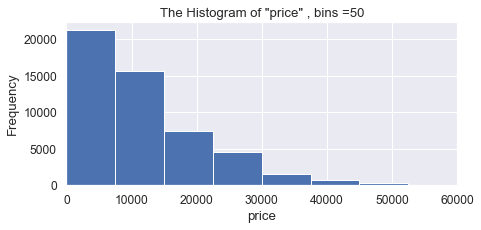

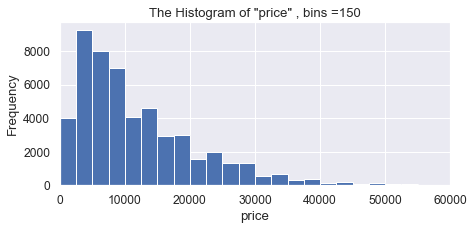

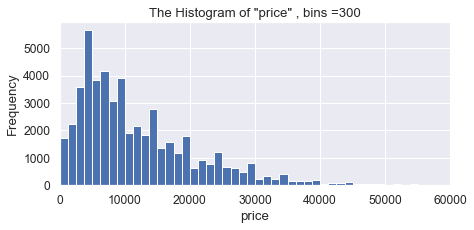

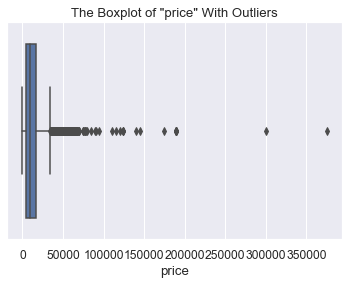

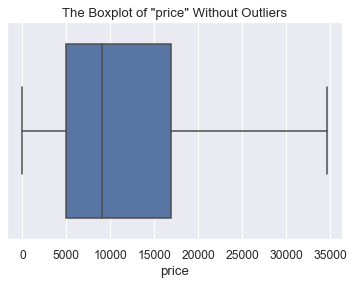

The distribution is skewed to the right
---------------------------------------
Statistics on: "price"
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
median:  9000.0
---------------------------------------
min border: -12758
max border: 34597
---------------------------------------
The outliers are considered to be values above 34597
We have 1646 values that we can consider outliers
Which makes 3.2 % of the price data


In [48]:
distribution_IQR(df=data, parameter='price', xlimit=60000, title_extension='', bins=[50, 150, 300], show_outliers_info=True)

- there are obvious outliers in the price field, we can see many in the Histogram, and in the Boxplot they are even more evident.
- the histogram is asymmetric, the mean and the median differ significantly: 12132 and 9000 -respectively. 

In [49]:
# we see strange value 1 in the price (we mentioned it earlier as well), let's check it
len(data.query('price==1'))
len(data.query('price==1'))/len(data)*100  # %of the whole dataframe 
data.query('price==1').sample(5)

798

1.5487627365356624

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
14310,1,2019,jeep wrangler,excellent,8,gas,3420,automatic,SUV,black,1,2019-04-08,47,2019,4,0,0,3420,4
11394,1,2015,dodge charger,excellent,10,gas,59772,other,sedan,unknown,1,2018-08-21,12,2018,8,1,3,19924,4
46283,1,2000,ford taurus,good,6,gas,167000,automatic,sedan,green,0,2018-07-12,118,2018,7,3,18,9277,3
20916,1,2018,dodge charger,excellent,10,gas,13046,other,sedan,white,1,2018-11-05,43,2018,11,0,0,13046,4
10875,1,2012,ford mustang,excellent,10,gas,41469,automatic,coupe,orange,1,2019-03-31,5,2019,3,6,7,5924,4


According to "1.5\*IQR aproach" the outliers are considered to be values above 34597. Meanwhile too low prices should be treated as outliers as well.

In [50]:
# let's calculate the price floor, the values below that we will treat as outliers
# the "percentile approach" would be handy for that purpose
np.percentile(data['price'], 5) # checking 5% percentile value
np.percentile(data['price'], 3) # checking 3% percentile value

1950.0

1000.0

In [51]:
len(data.query('price<1000'))/len(data)*100 # %of the whole dataframe 

2.7248908296943233

We can somehow believe in a price of about 2000, e.g. for a car in salvage condition. A price lower than 1000 seems unrealistic, so let's take the 3rd  percentile as the bottom line and treat all prices lower than 1000 as outliers. Thus we'll cut out ~3% of the dataset.

### Studying the `age_posted` Parameter

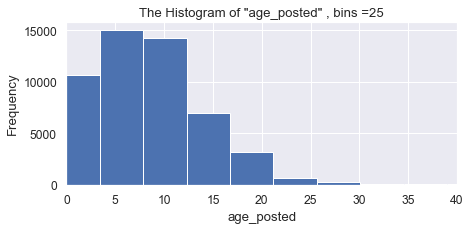

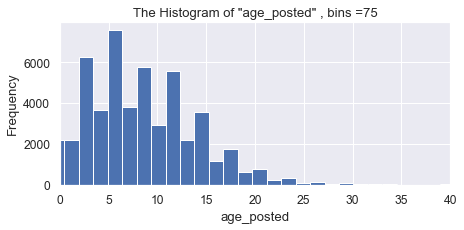

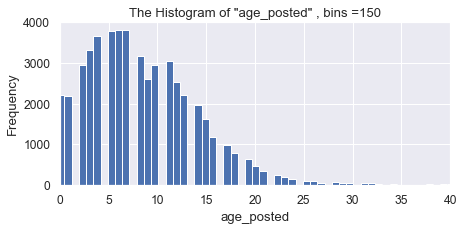

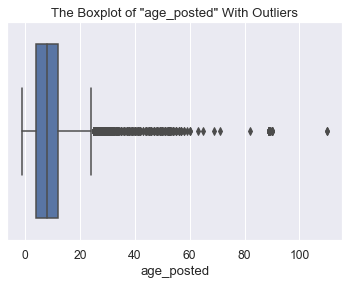

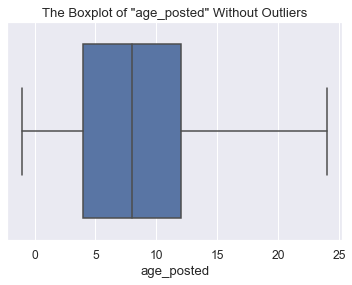

The distribution is skewed to the right
---------------------------------------
Statistics on: "age_posted"
count    51525.000000
mean         8.604037
std          6.504580
min         -1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age_posted, dtype: float64
---------------------------------------
median:  8.0
---------------------------------------
min border: -8
max border: 24
---------------------------------------
The outliers are considered to be values above 24
We have 796 values that we can consider outliers
Which makes 1.5 % of the age_posted data


In [52]:
distribution_IQR(df=data, parameter='age_posted', xlimit=40, bins=[25, 75, 150], show_outliers_info=True)

- there are obvious outliers in the age_posted field, we can see many at the Histogram, at the Boxplot they are even more evident.
- the histogram is asymmetric, the mean and the median differ noticeably: 8.7 and 8 -respectively. 

In [53]:
# checking a sample of data where `age_posted` parameter values is above 24 (values defined as outliers so far)
data.query('age_posted > 24').sample(5) 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
2479,4250,1993,ford f-250,fair,8,diesel,242000,automatic,truck,unknown,1,2019-03-20,70,2019,3,2,26,9307,2
33257,4500,1963,chevrolet impala,fair,5,gas,40487,automatic,sedan,unknown,0,2019-03-17,38,2019,3,6,56,722,2
17539,4000,1989,ford f150,good,6,gas,96000,automatic,pickup,unknown,0,2019-02-11,77,2019,2,0,30,3200,3
10011,17000,1993,chevrolet corvette,excellent,8,gas,18450,automatic,hatchback,unknown,0,2019-03-18,11,2019,3,0,26,709,4
28800,11999,1978,chevrolet corvette,good,6,gas,73411,automatic,coupe,unknown,0,2019-02-07,19,2019,2,3,41,1790,3


In [54]:
# just in case, let's check the occasions when cars are for sure younger than 3 months (`age_posted` = 0, month_posted <=3)
# and have extremely high car mileage - over 10k miles a month (odometer > 30000)
data.query('age_posted==0 & month_posted <=3 & odometer>30000').sample(5)
len(data.query('age_posted==0 & month_posted <=3 & odometer>30000'))/len(data)*100 # %of the whole dataframe 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
35201,40950,2019,ford f-250 sd,excellent,8,diesel,31872,automatic,truck,white,1,2019-02-23,42,2019,2,5,0,31872,4
5323,41788,2019,chevrolet silverado 2500hd,excellent,8,diesel,55621,automatic,truck,white,1,2019-02-08,52,2019,2,4,0,55621,4
31786,287,2019,chevrolet impala,like new,6,gas,36147,automatic,sedan,silver,0,2019-02-03,31,2019,2,6,0,36147,5
43446,40000,2019,ford f-250,excellent,8,gas,36134,automatic,truck,unknown,1,2019-01-12,86,2019,1,5,0,36134,4
38083,37995,2019,jeep wrangler,good,6,gas,31756,automatic,SUV,black,1,2019-02-04,41,2019,2,0,0,31756,3


0.07180980106744299

The % of such data is lower than 0,1%, so it's not even worth spending time filtering that. 
So we keep only our upper border of 24 years.

### Studying the `odometer` Parameter

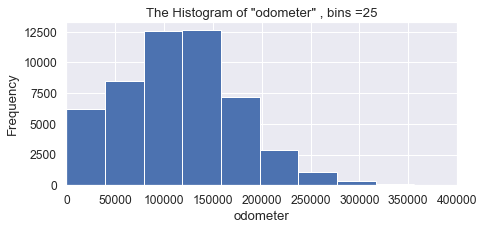

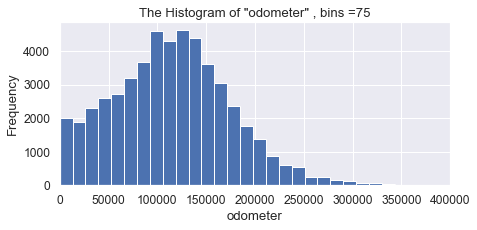

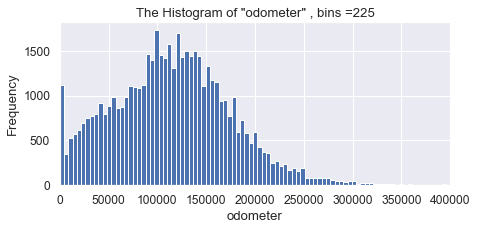

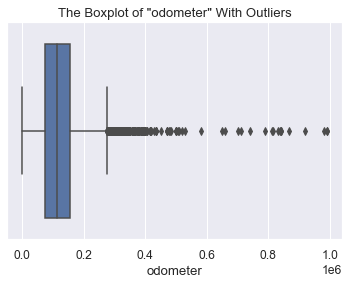

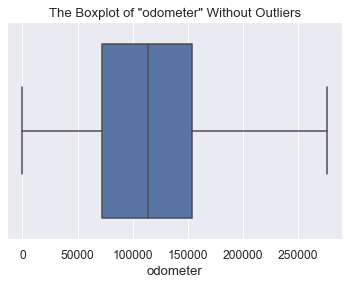

The distribution is skewed to the right
---------------------------------------
Statistics on: "odometer"
count     51525.000000
mean     115465.587870
std       62913.540688
min           0.000000
25%       72059.000000
50%      114000.000000
75%      153592.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
median:  114000.0
---------------------------------------
min border: -50241
max border: 275892
---------------------------------------
The outliers are considered to be values above 275892
We have 586 values that we can consider outliers
Which makes 1.1 % of the odometer data


In [55]:
distribution_IQR(df=data, parameter='odometer', xlimit=400000, bins=[25, 75, 225], show_outliers_info=True)          

- there are obvious outliers in the odometer field, we can see many at the Histogram, at the Boxplot they are even more evident.
- the histogram is slightly asymmetric, the mean and the median are very close: 115638 and 114072 -respectively. 

In [56]:
# On the histogram with 150 bins we see a strange high amount of value = 0, let's check it
len(data.query('odometer==0'))
len(data.query('odometer==0'))/len(data)*100 # %of the whole dataframe 

199

0.386220281416788

In [57]:
data.query('odometer==0').head(20) # checking dataset where odometer values = 0 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
352,7997,2009,gmc yukon,excellent,8,gas,0,automatic,SUV,white,1,2019-03-16,88,2019,3,5,10,0,4
814,2995,1999,ford f-150,good,6,gas,0,manual,truck,unknown,0,2019-03-14,16,2019,3,3,20,0,3
1375,5888,2004,toyota 4runner,good,6,gas,0,automatic,SUV,black,0,2019-02-22,36,2019,2,4,15,0,3
1461,1000,1992,gmc sierra 1500,good,8,gas,0,automatic,truck,unknown,0,2018-09-28,47,2018,9,4,26,0,3
1970,10988,2000,ford f-250 sd,good,8,diesel,0,automatic,truck,white,1,2018-11-21,39,2018,11,2,18,0,3
2049,30000,1969,chevrolet corvette,excellent,8,other,0,automatic,convertible,white,0,2018-08-01,20,2018,8,2,49,0,4
2077,11888,2010,chevrolet silverado 1500,good,8,gas,0,automatic,truck,white,0,2018-07-02,24,2018,7,0,8,0,3
2506,3000,2006,honda civic,good,6,gas,0,automatic,sedan,silver,0,2018-06-02,37,2018,6,5,12,0,3
3640,4200,2010,nissan murano,good,6,gas,0,automatic,SUV,red,1,2018-08-24,21,2018,8,4,8,0,3
4186,11888,2010,chevrolet silverado 1500,good,8,gas,0,automatic,truck,white,0,2018-12-06,71,2018,12,3,8,0,3


In [58]:
data.query('0<odometer<500').head(20) # checking dataset where odometer values are between 0 and 500

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
73,1900,1994,jeep grand cherokee laredo,good,6,gas,207,automatic,SUV,grey,1,2018-07-27,9,2018,7,4,24,8,3
222,2750,2006,honda civic lx,good,4,gas,200,manual,sedan,black,0,2018-07-06,41,2018,7,4,12,16,3
330,25000,2009,ford f-250 sd,excellent,8,diesel,155,automatic,truck,black,1,2018-06-09,39,2018,6,5,9,17,4
501,6300,2003,toyota rav4,excellent,4,gas,107,automatic,SUV,red,1,2018-09-16,24,2018,9,6,15,7,4
510,3900,2008,ford escape,good,4,gas,137,automatic,SUV,unknown,0,2018-08-02,59,2018,8,3,10,13,3
621,7999,2010,honda accord,like new,4,gas,91,automatic,sedan,silver,0,2018-07-23,18,2018,7,0,8,11,5
732,6750,2007,ram 1500,good,8,gas,168,automatic,pickup,brown,1,2018-06-15,29,2018,6,4,11,15,3
833,44505,2019,dodge charger,new,8,gas,202,automatic,sedan,black,0,2019-02-06,44,2019,2,2,0,202,6
929,4995,2003,ford f-150,like new,8,gas,181,automatic,truck,brown,0,2018-05-16,60,2018,5,2,15,12,5
1146,3299,2006,dodge grand caravan,like new,6,gas,110,automatic,mini-van,unknown,0,2019-04-14,21,2019,4,6,13,8,5


In [59]:
len(data.query('0<odometer<500'))/len(data)*100 # %of the whole dataframe 

1.2440562833575934

- odometer 0 values in 20+ years old vehicles- that doesn't seem to be a coincidence. 
- odometer value like 150 in a 20-year-old car in a fair condition - these figures don't inspire confidence too.

In [60]:
# let's calculate the price floor, the values below that we will treat as outliers
# the "percentile approach" would be handy for that purpose
np.percentile(data['odometer'], 5) # checking 5% percentile value
np.percentile(data['odometer'], 3) # checking 3% percentile value

17615.200000000004

9815.0

In [61]:
len(data.query('odometer<18000'))/len(data)*100 # %of the whole dataframe 
len(data.query('odometer<9990'))/len(data)*100 # %of the whole dataframe 

5.102377486656963

3.0276564774381365

- the odometer max border was discovered as 274863.
- odometer values lower than 500 seem to be unrealistic in any case. So we'll treat them as outliers as well. 
- the odometer value of ~10K miles seems OK for a more or less new car. But not e.g. for a 5-year-old car. So we can count as outliers odometer values below 9990 (3% percentile) when the car's age is above 5 years.

Let's combine our assumptions into a mask we would use as an outliers filter in the ongoing steps.

In [62]:
#additional filter for dropping outliers in odometer fields on the next steps
odometer_mask = (data['odometer']<274863) & (data['odometer']>500) & ~((data['odometer']<9990) & (data['age_posted']>5))
data[odometer_mask] # checking the result (data without outliers in the odometer field)
(len(data)-len(data[odometer_mask]))/len(data)*100 # %of outliers in the odometer field from the whole dataframe 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714,3
1,25500,2014,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,4,22176,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333,5
3,1500,2003,ford f-150,fair,8,gas,160000,automatic,pickup,unknown,0,2019-03-22,9,2019,3,4,16,10000,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,2,40451,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2018,10,2,5,17627,5
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,2,16,11343,1
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2018,11,3,9,14222,4
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2018,7,0,5,27914,3


2.9422610383309076

By applying the filter on odometer field we get rid of ~3% of doubtful data.

### Studying the `mileage_per_year` Parameter
The odometer value can vary significantly based on the car's age, so we will also look at the "mileage per year" parameter to determine outliers.

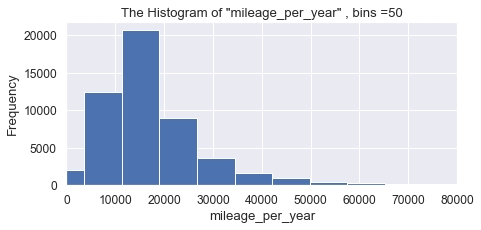

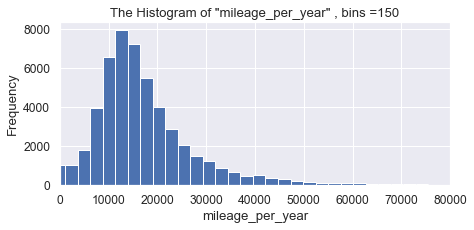

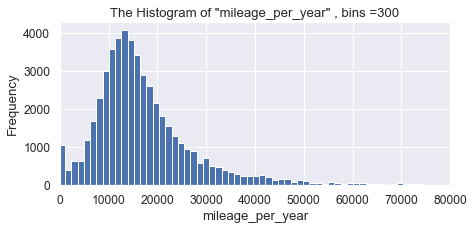

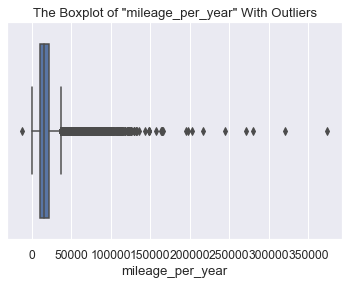

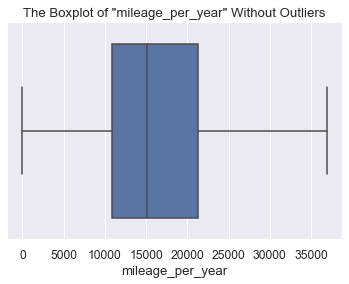

The distribution is skewed to the right
---------------------------------------
Statistics on: "mileage_per_year"
count     51525.000000
mean      17855.110102
std       12883.008999
min      -11745.000000
25%       10812.000000
50%       15050.000000
75%       21249.000000
max      373200.000000
Name: mileage_per_year, dtype: float64
---------------------------------------
median:  15050.0
---------------------------------------
min border: -4844
max border: 36905
---------------------------------------
The outliers are considered to be values above 36905
We have 3254 values that we can consider outliers
Which makes 6.3 % of the mileage_per_year data


In [63]:
distribution_IQR(df=data, parameter='mileage_per_year', xlimit=80000, bins=[50, 150, 300], show_outliers_info=True)          

- there are obvious outliers in the mileage_per_year field, we can see many at the Histogram, at the Boxplot they are even more evident.
- the histogram is slightly asymmetric, the mean and the median differ noticeably: 17855 and 15050 -respectively. 
- the max border is 36905, but this number looks quite realistic, e.g. in cases where cars are intensively used for long distances. So let's use "percentile" to setting the max border. 

In [64]:
np.percentile(data['mileage_per_year'], 95) # checking 3% percentile value
np.percentile(data['mileage_per_year'], 97) # checking 3% percentile value

40421.99999999998

47108.51999999999

47108 miles per year looks as a reasonable max border, we'll use that (all values above we will treat as outliers). 

In [65]:
# mileage_per_year min value "-1" looks strange, let's check it and other negative values, if any
data.query('mileage_per_year<0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
48503,21800,2019,nissan frontier crew cab sv,good,6,gas,11745,other,pickup,white,0,2018-10-25,86,2018,10,3,-1,-11745,3


The issue is only in one ad, seems because of a mistake in the model_year field. Let's fix it. 
We'll do that by assigning the `year_posted` value to the `model_year` value and refreshing `age_posted` and `mileage_per_year` fields calculations.

In [66]:
data.loc[48503, 'model_year'] = data.loc[48503, 'year_posted']
data['age_posted'] = data['year_posted'] - data['model_year']
data['mileage_per_year'] = data.apply(mileage_per_year_calc, axis = 1)

In [67]:
#cheking the result
data.loc[48503,] 
len(data.query('mileage_per_year<0'))

price                                     21800
model_year                                 2018
model               nissan frontier crew cab sv
condition                                  good
cylinders                                     6
fuel                                        gas
odometer                                  11745
transmission                              other
type                                     pickup
paint_color                               white
is_4wd                                        0
date_posted                 2018-10-25 00:00:00
days_listed                                  86
year_posted                                2018
month_posted                                 10
weekday_posted                                3
age_posted                                    0
mileage_per_year                        11745.0
condition_calc                                3
Name: 48503, dtype: object

0

All is fine now - no negative values in the mileage_per_year field.

In [68]:
len(data.query('mileage_per_year>47108'))/len(data)*100 # %of the whole dataframe 

3.000485201358564

Thus by getting rid of ads with outliers in mileage_per_year field we cut 3% of all the data.

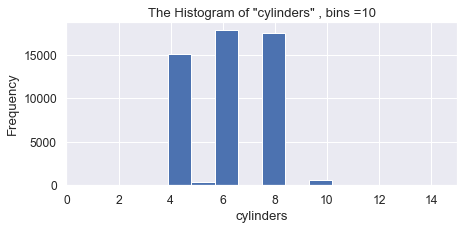

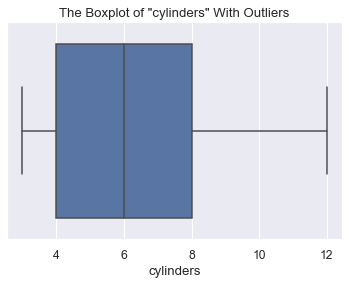

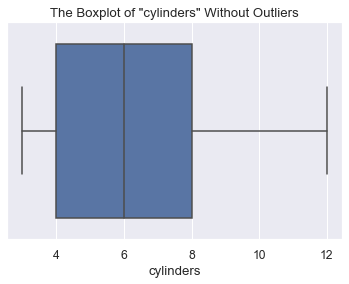

The distribution is skewed to the right
---------------------------------------
Statistics on: "cylinders"
count    51525.000000
mean         6.125182
std          1.644678
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
median:  6.0
---------------------------------------
min border: -2
max border: 14
---------------------------------------
The outliers are considered to be values above 14
We have 0 values that we can consider outliers
Which makes 0.0 % of the cylinders data


In [69]:
# studying the cylinders parameter
distribution_IQR(df=data, parameter='cylinders', xlimit=15, bins=[10], show_outliers_info=True)

- there are no outliers in the cylinders field. 
- the mean and the median are very close: 6.1 and 6 -respectively. 
- the most popular values are: 6,8,4.

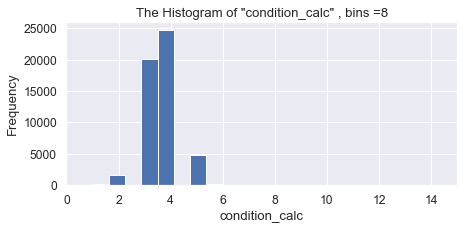

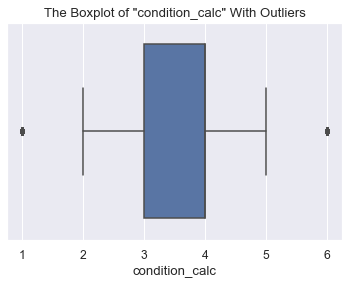

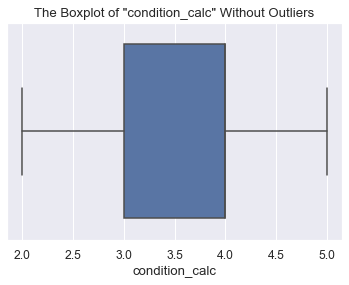

The distribution is skewed to the left
---------------------------------------
Statistics on: "condition_calc"
count    51525.000000
mean         3.637535
std          0.712447
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: condition_calc, dtype: float64
---------------------------------------
median:  4.0
---------------------------------------
min border: 1
max border: 6
---------------------------------------
The outliers are considered to be values below 1 and above 6
We have 0 values that we can consider outliers
Which makes 0 % of the condition_calc data


In [70]:
# studying the condition parameter
distribution_IQR(df=data, parameter='condition_calc', xlimit=15, bins=[8], show_outliers_info=True)  

- there are no outliers in the condition field.
- the mean and the median are quite close: 3.6 and 4.0 -respectively. 
- the most popular values are: 4 and 3 (excellent and good conditions)

## 🛠️ Treating Outliers <a name="treating-outliers"></a>

### Overview of Outliers
**Let's summarize what we treat as outliers of parameters we study**:

- prices higher than 34597 and lower than 1000
- cars ages above 24
- odometers' values higher than 274863 and lower than 500. And odometers' values below 9990 when the cars' ages are above 5-years
- mileage_per_year values higher than 47108
- no outliers detected in the cylinders and the condition fields 

### Creating and Checking a Dataframe Without Outliers

In [71]:
# let's store data without outliers in a separate dataframe
data_no_outliers = data[odometer_mask].query('(1000<price<34597) & (age_posted<24) & (mileage_per_year<40421)')

# checking the dataframe without outliers
data_no_outliers.info()
data_no_outliers.describe()
data_no_outliers.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 44001 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             44001 non-null  int64         
 1   model_year        44001 non-null  int32         
 2   model             44001 non-null  object        
 3   condition         44001 non-null  object        
 4   cylinders         44001 non-null  int32         
 5   fuel              44001 non-null  object        
 6   odometer          44001 non-null  int32         
 7   transmission      44001 non-null  object        
 8   type              44001 non-null  object        
 9   paint_color       44001 non-null  object        
 10  is_4wd            44001 non-null  int32         
 11  date_posted       44001 non-null  datetime64[ns]
 12  days_listed       44001 non-null  int64         
 13  year_posted       44001 non-null  int32         
 14  month_posted      44001 non

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
count,44001.000000,44001.000000,44001.000000,44001.000000,44001.000000,44001,44001.000000,44001.000000,44001.000000,44001.000000,44001.000000,44001.000000,44001.000000
mean,11326.151019,2009.712643,6.051635,118809.470648,0.484489,2018-10-26 07:08:03.779914240,39.589214,2018.315288,6.575305,3.002932,8.602645,16157.828287,3.625736
min,1095.000000,1995.000000,3.000000,677.000000,0.000000,2018-05-01 00:00:00,0.000000,2018.000000,1.000000,0.000000,0.000000,177.750000,1.000000
25%,5300.000000,2006.000000,4.000000,80836.000000,0.000000,2018-07-30 00:00:00,19.000000,2018.000000,3.000000,1.000000,5.000000,11000.000000,3.000000
50%,8995.000000,2010.000000,6.000000,118727.000000,0.000000,2018-10-26 00:00:00,33.000000,2018.000000,7.000000,3.000000,8.000000,14787.400000,4.000000
75%,15900.000000,2013.000000,8.000000,155072.000000,1.000000,2019-01-23 00:00:00,53.000000,2019.000000,10.000000,5.000000,12.000000,20011.500000,4.000000
max,34595.000000,2019.000000,12.000000,274700.000000,1.000000,2019-04-19 00:00:00,271.000000,2019.000000,12.000000,6.000000,23.000000,40400.000000,6.000000
std,7607.312699,4.898169,1.609084,54690.629047,0.499765,NaN,28.287241,0.464636,3.482804,1.995396,4.899695,7371.137970,0.689938


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age_posted,mileage_per_year,condition_calc
47112,3500,2004,toyota camry le,excellent,4,gas,138468,automatic,sedan,green,0,2018-10-30,99,2018,10,1,14,9890.571429,4
23064,9500,2007,toyota rav4,excellent,4,gas,81392,automatic,SUV,silver,1,2018-11-15,8,2018,11,3,11,7399.272727,4
26903,17900,2015,chevrolet silverado 1500,excellent,8,gas,78910,automatic,truck,silver,0,2018-09-27,38,2018,9,3,3,26303.333333,4
51508,4950,2006,chrysler town & country,excellent,6,gas,150000,automatic,mini-van,silver,0,2018-06-30,48,2018,6,5,12,12500.000000,4
11408,12000,2007,chevrolet silverado 1500,excellent,8,gas,204000,automatic,truck,unknown,1,2018-06-10,26,2018,6,6,11,18545.454545,4


In [72]:
print(f'Share of removed outliers from all data: {round((len(data)-len(data_no_outliers))/len(data)*100, 1)}%')

Share of removed outliers from all data: 14.6%


Everything looks fine in the output above. E.g. min and max values of studying parameters are as they are supposed to be.
By cutting the outliers we've gotten rid of ~15% of the initial data.

## 🔍 Studying Parameters Without Outliers <a name="studying-parameters-without-outliers"></a>

Let's perform our visual and statistical analysis, now - on the edited data without outliers.
We'll do that for `price`, `age_posted`, `odometer` and `mileage_per_year`fields (no outliers detected in the other `cylinders` and `condition` fields).

### Studying the `price` Parameter Without Outliers

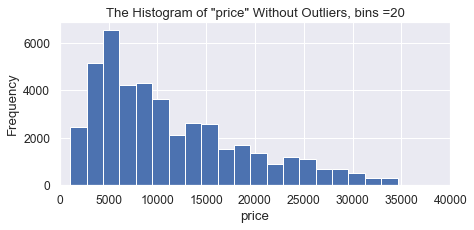

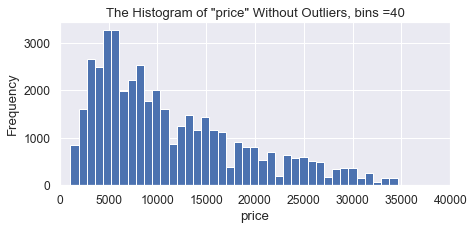

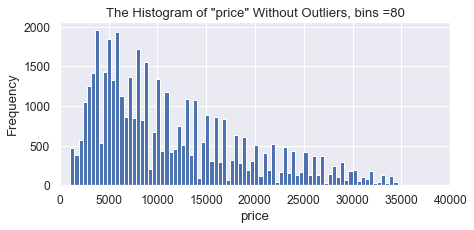

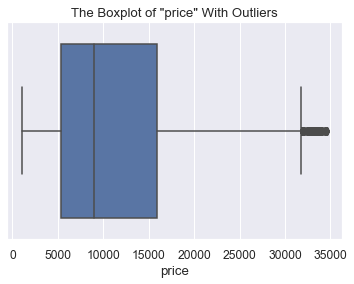

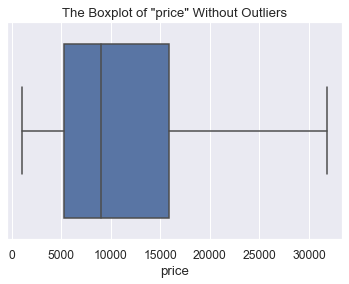

The distribution is skewed to the right
---------------------------------------
Statistics on: "price"
count    44001.000000
mean     11326.151019
std       7607.312699
min       1095.000000
25%       5300.000000
50%       8995.000000
75%      15900.000000
max      34595.000000
Name: price, dtype: float64
---------------------------------------
median:  8995.0


In [73]:
distribution_IQR(df=data_no_outliers, parameter='price', xlimit=40000, title_extension='Without Outliers', bins=[20, 40, 80], show_outliers_info=False)

- let's recollect mean and median values in data with outliers, they were: 12132 and 9000 -respectively. 
- without outliers the mean and the median are: 11614 and 9499 -respectively.
- so by cutting the outliers, the mean decreased by 4.7%, and the median otherwise increased by 5%. It must be the result of removing ads with very high prices.
- even without outliers the distribution is unsymmetrical, so median (rather than mean) does a better job of capturing the typical or "middle" price which is 9499. If we take a broader range we can say that a half of all ads have a price between 5500 and 16000.

In [74]:
(11563-12132)/12132*100 # mean change in %
(9450-9000)/9000*100 # median change in %

-4.690075832509067

5.0

### Studying the `age_posted` Parameter Without Outliers

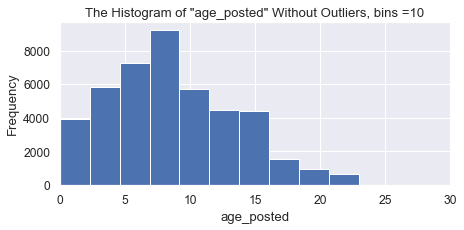

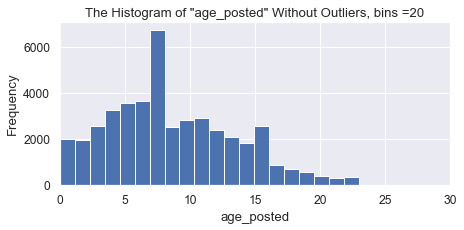

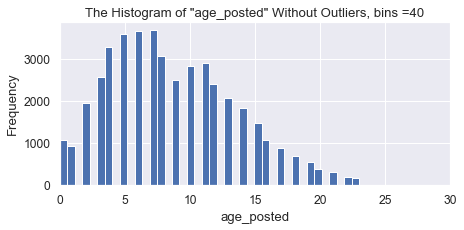

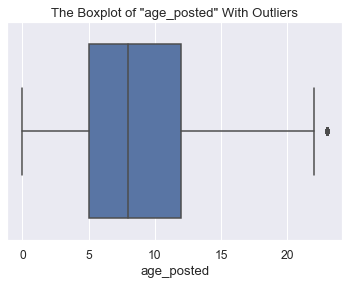

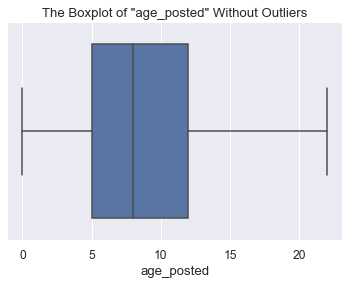

The distribution is skewed to the right
---------------------------------------
Statistics on: "age_posted"
count    44001.000000
mean         8.602645
std          4.899695
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: age_posted, dtype: float64
---------------------------------------
median:  8.0


In [75]:
distribution_IQR(df=data_no_outliers, parameter='age_posted', xlimit=30, title_extension='Without Outliers', bins=[10, 20, 40], show_outliers_info=False)

- let's recollect mean and median values in data with outliers, they were: 8.7 and 8 -respectively. 
- without outliers mean and median are: 8.3 and 8 -respectively.
- so by cutting the outliers, the mean decreased by 3.4%, and the median stayed the same. It must be the result of removing ads with cars' ages above 24.
- even without outliers the distribution is unsymmetrical, so median (rather than mean) does a better job of capturing the typical or "middle" age which is 8. If we take a broader range we can say that a half of all ads have cars age between 4 and 12.

In [76]:
(8.4-8.7)/8.7*100 # mean change in %

-3.4482758620689538

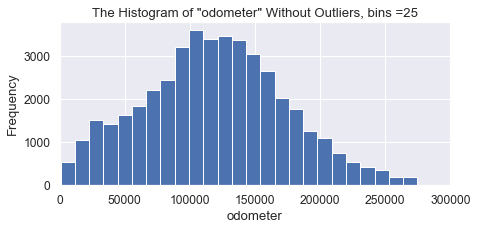

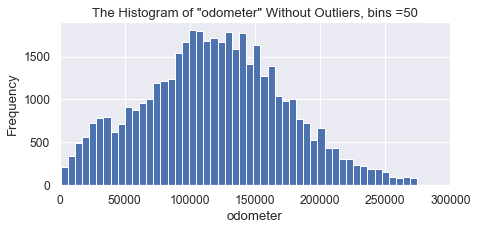

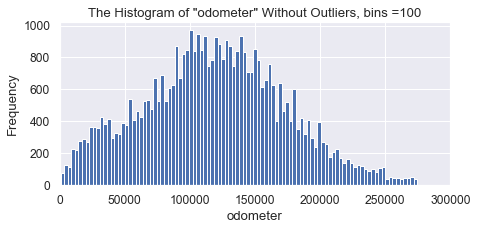

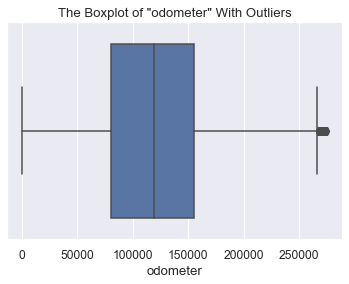

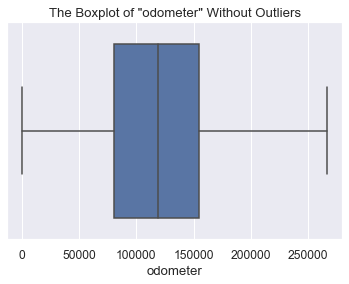

The distribution is skewed to the right
---------------------------------------
Statistics on: "odometer"
count     44001.000000
mean     118809.470648
std       54690.629047
min         677.000000
25%       80836.000000
50%      118727.000000
75%      155072.000000
max      274700.000000
Name: odometer, dtype: float64
---------------------------------------
median:  118727.0


In [77]:
# studying the `odometer` parameter without outliers
distribution_IQR(df=data_no_outliers, parameter='odometer', xlimit=300000, title_extension='Without Outliers', bins=[25, 50, 100], show_outliers_info=False)

- let's recollect mean and median values in data with outliers, they were: 115638 and 114072 -respectively. 
- without outliers mean and median are: 118302 and 118000 -respectively. 
- so by cutting the outliers, the mean and median increased by 2.3% and 3.4% - responsibly. It must be the result of removing ads with very low odometers' values (mainly zeros and others below 500).
- it's worth noting that the distribution of the odometer field looks almost like the normal distribution when based on data without outliers. And the mean and the median are almost the same.
- the "middle" odometer value is 118000, half of all ads have odometer figures between 80000 and ~154000.

In [78]:
(118302-115638)/115638*100 # mean change in %
(118000-114072)/114072*100 # median change in %

2.303740984797385

3.443439231362648

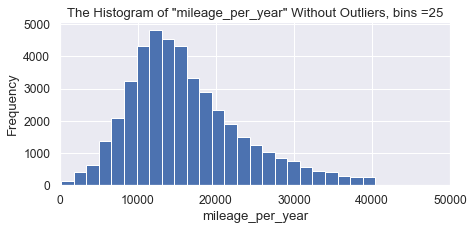

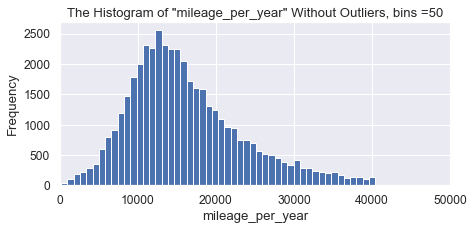

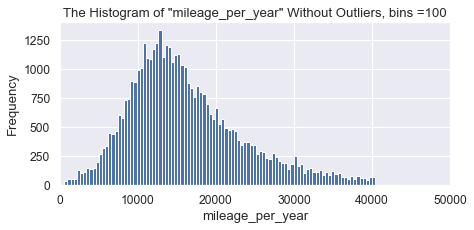

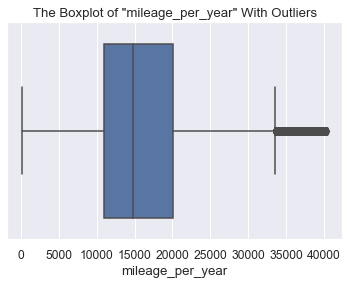

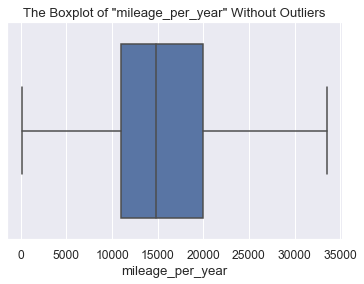

The distribution is skewed to the right
---------------------------------------
Statistics on: "mileage_per_year"
count    44001.000000
mean     16157.828287
std       7371.137970
min        177.750000
25%      11000.000000
50%      14787.400000
75%      20011.500000
max      40400.000000
Name: mileage_per_year, dtype: float64
---------------------------------------
median:  14787.4


In [79]:
# studying the mileage_per_year parameter without outliers
distribution_IQR(df=data_no_outliers, parameter='mileage_per_year', xlimit=50000, title_extension='Without Outliers', bins=[25, 50, 100], show_outliers_info=False)

- let's recollect mean and median values in data with outliers, they were: 17855 and 15050 -respectively. 
- without outliers mean and median are: 16157 and 14787 -respectively. 
- so by cutting the outliers, the mean and median decreased by 9.5% and 1.7% - responsibly. It must be the result of removing ads with high mileage per year.
- the "middle" mileage per year value is 14787, half of all ads have odometer figures between 11000 and ~20011.

In [80]:
(16157-17855)/17855*100 # mean change in %
(14787-15050)/15050*100 # median change in %

-9.509941192943153

-1.7475083056478404

### Studying the `days_listed` Parameter 
Thus we'll to get the picture about the ads lifitime.

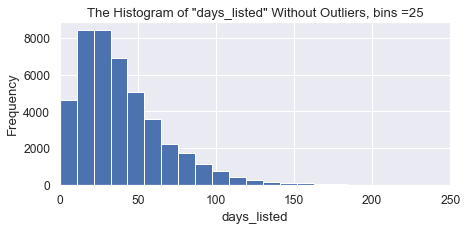

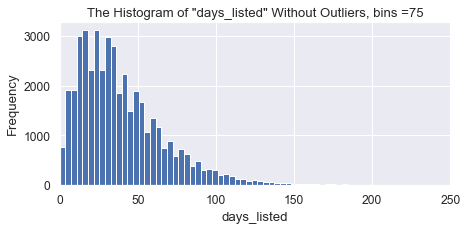

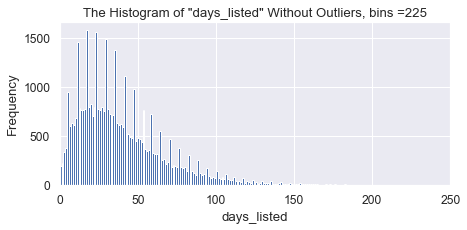

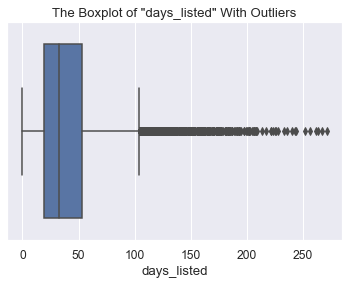

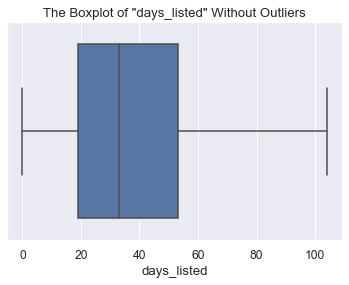

The distribution is skewed to the right
---------------------------------------
Statistics on: "days_listed"
count    44001.000000
mean        39.589214
std         28.287241
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
---------------------------------------
median:  33.0
---------------------------------------
min border: -32
max border: 104
---------------------------------------
The outliers are considered to be values above 104
We have 1397 values that we can consider outliers
Which makes 3.2 % of the days_listed data


In [81]:
distribution_IQR(df=data_no_outliers, parameter='days_listed', xlimit=250, title_extension='Without Outliers', show_outliers_info=True)

- there are obvious outliers in the days_listed field. We can see many in the Histogram, but in the Boxplot they are even more evident.
- the histogram is asymmetric, and the mean is notably higher than the median: 40 days and 33 -respectively. Taking into account this asymmetry, the median would be a better representative of a typical lifetime of an ad. 
- upper border is 104 days, and the numbers above that we can treat as abnormally long time of ads.
- at the same time "1.5*IQR aproach" doesn't provide us a relevant a minimum border (-32 value is not suitable for sure). So we'll use the "percentile approach" for this purpose. Ads with values below that we would treat as removed quickly.

Let's calculate the days_listed floor. The "percentile approach" would be handy for that purpose.

In [82]:
np.percentile(data['days_listed'], 5) # checking 5% percentile value
np.percentile(data['days_listed'], 3) # checking 3% percentile value

7.0

5.0

In [83]:
len(data.query('days_listed<7'))/len(data)*100 # %of the whole dataframe 
len(data.query('days_listed<5'))/len(data)*100 # %of the whole dataframe 

4.696749150897622

2.5385735080058223

- as we defined earlier, the upper border is 104 days, so ads listed for a longer period we will count as abnormally long ones. These ads represent 3.2% of all the dataset.
- let's take 5 days in ads listing as the minimum border, so ads listed for just 1-4 days we will treat as quick ones. These ads represent 2.5% of all the dataset.
- as the median value is 33, we can say that the average lifetime of an ad is a little over a month.
- 1Q and 3Q values indicate that the half of all the ads had been removed within 19 to 53 days period.

## 💲🚗 Average Prices by Vehicle Type <a name="average-prices-by-vehicle-type"></a>

In [84]:
# let's analyze prices of different types of vehicles 
# the distribution of price is unsymmetrical, so median (rather than mean) is a better choice for the typical or "middle" price
price_by_type = (data_no_outliers.groupby(['type'])['price']
                                 .agg(['count','median'])
                                 .reset_index()
                                 .sort_values(by='count', ascending=False))
price_by_type

,type,count,median
0,SUV,10902,8900.0
9,sedan,10767,5995.0
10,truck,9997,14500.0
8,pickup,5906,13995.0
3,coupe,1834,13900.0
12,wagon,1408,7950.0
5,mini-van,1048,6272.5
4,hatchback,906,5995.0
11,van,514,7445.0
2,convertible,319,12988.0


In [85]:
data_no_outliers['price'].median() # median of all prices

8995.0

In [86]:
len(data_no_outliers.query('type in ["SUV", "sedan"]'))/len(data)*100 # %of the whole dataframe 

42.05531295487627

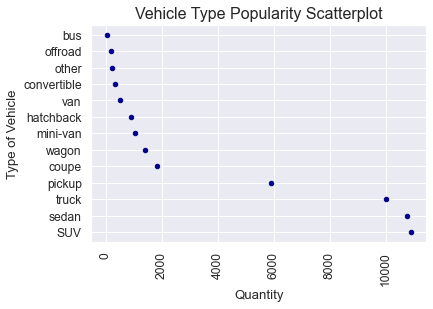

In [87]:
# studying the dependence of the number of ads on the vehicle type
price_by_type_for_scatter = data_no_outliers['type'].value_counts(sort=True).reset_index()
price_by_type_for_scatter.plot(kind='scatter', x='count', y='type', color='darkblue', grid=True)
plt.xticks(rotation=90)
plt.title('Vehicle Type Popularity Scatterplot', fontsize=16)        
plt.ylabel('Type of Vehicle')
plt.xlabel('Quantity');

- we see 13 types of vehicles, the two most popular are SUVs and sedans. Ads of these two types represent 44% (almost half!) of all the data without outliers.
- prices of SUVs and sedans are lower than average, they are ~9000 and 6200 -respectively against ~9500 -the median of all types.
- the most expensive vehicles are buses with the median price of ~29000, which is 3 times higher than the median for all types. But there are really few ads of such types.
- there is a high dependence of the number of ads on the vehicle type, it's very well seen in the Scatterplot.

## 💲🎨 The Other Price Factors <a name="the-other-price-factors"></a>

### Impact of Age, Mileage and Condition on Price

These categories are quantitative and we will use correlation matrices, correlation plots and other types of plots to study them. 

In [88]:
# let's start discovering price factors by forming datasets of the two most popular vehicles types: SUVs and sedans
suv_and_sedan = data_no_outliers.query('type in ["SUV", "sedan"]')
suv = data_no_outliers.query('type=="SUV"')
sedan = data_no_outliers.query('type=="sedan"') 

# checking quantity of vehicles by their type
print('SUV and Sedan Quantity:', len(suv_and_sedan))
print('SUV and Sedan Quantity:', len(suv))
print('SUV and Sedan Quantity:', len(sedan))

SUV and Sedan Quantity: 21669
SUV and Sedan Quantity: 10902
SUV and Sedan Quantity: 10767


In [89]:
# let's check the correlation between price and the other quantitative parameters we studying for both SUV and sedan types
suv_and_sedan[['price', 'age_posted', 'odometer', 'condition_calc']].corr()

,price,age_posted,odometer,condition_calc
price,1.000000,-0.585960,-0.571563,0.270362
age_posted,-0.585960,1.000000,0.669388,-0.281928
odometer,-0.571563,0.669388,1.000000,-0.314419
condition_calc,0.270362,-0.281928,-0.314419,1.000000


We see the following correlation between price and the other quantitative parameters:
- cars' ages - the moderate negative correlation: -0.59
- mileage - the moderate negative correlation: -0.57
- condition - the weak positive correlation: 0.27

In [90]:
# let's check the correlation between price and the other quantitative parameters we studying for SUV type only
suv[['price', 'age_posted', 'odometer', 'condition_calc']].corr()

,price,age_posted,odometer,condition_calc
price,1.000000,-0.665057,-0.653780,0.288740
age_posted,-0.665057,1.000000,0.671673,-0.298173
odometer,-0.653780,0.671673,1.000000,-0.320493
condition_calc,0.288740,-0.298173,-0.320493,1.000000


In [91]:
# let's check the correlation between price and the other quantitative parameters we studying for sedan type only
sedan[['price', 'age_posted', 'odometer', 'condition_calc']].corr()

,price,age_posted,odometer,condition_calc
price,1.000000,-0.686936,-0.671552,0.314896
age_posted,-0.686936,1.000000,0.657200,-0.267885
odometer,-0.671552,0.657200,1.000000,-0.310930
condition_calc,0.314896,-0.267885,-0.310930,1.000000


The correlations between price and the other quantitative parameters are almost the same if we take data for SUV and sedan  types together and them separately.

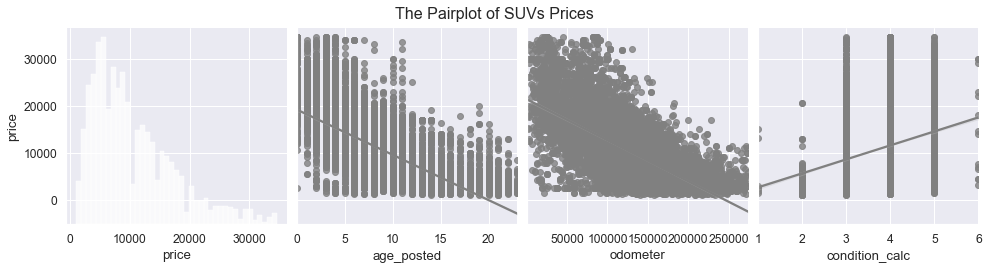

In [92]:
# checking dependency of price on age, mileage and condition for SUV type
sns.pairplot(kind='reg', data=suv[['price', 'age_posted', 'odometer', 'condition_calc']],\
             y_vars='price', diag_kws={'color':'white'}, plot_kws={'color':'grey'}, height=3.5)
plt.suptitle('The Pairplot of SUVs Prices', verticalalignment='top', y=1.05, fontsize=16);

- the **dependency between prices and ages** of the vehicles is quite noticeable. Basically, **the higher an age, the lower a price**.
- the **dependency between prices and values** of odometers is quite noticeable too. Basically, **the higher an odometer value, the lower a price**.
- the **dependency between prices and conditions of vehicles** is also well seen. Basically, **the better a condition, the higher a price**.

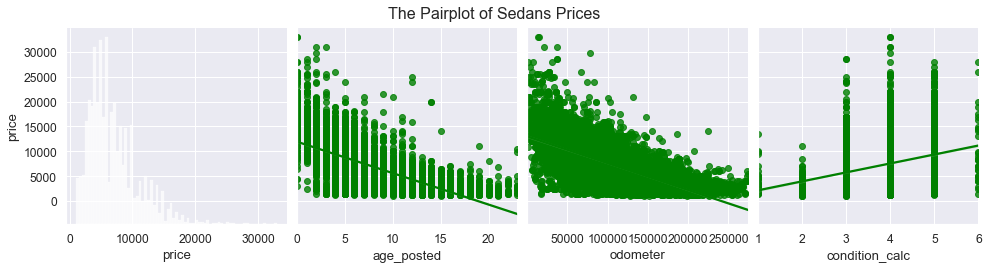

In [93]:
# checking dependency of price on age, mileage and condition for sedan type
sns.pairplot(kind='reg', data=sedan[['price', 'age_posted', 'odometer', 'condition_calc']],\
             y_vars='price', diag_kws={'color':'white'}, plot_kws={'color':'green'}, height=3.5)
plt.suptitle('The Pairplot of Sedans Prices', verticalalignment='top', y=1.05, fontsize=16);

The findings for sedan are the same as for SUV type.

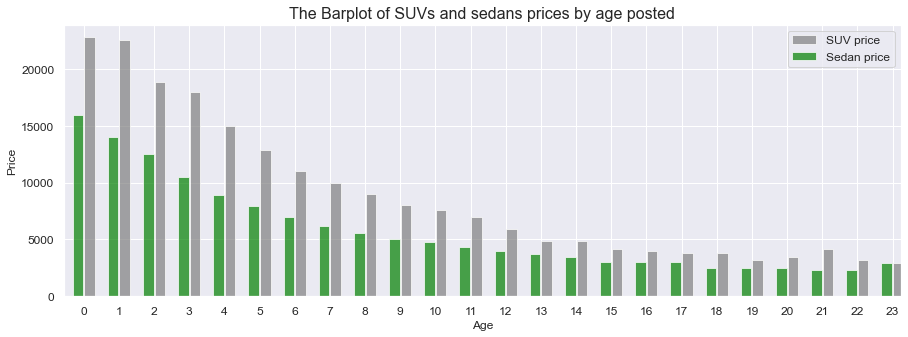

In [94]:
# studying prices of SUVs and sedans by ages
suv.groupby('age_posted')['price'].median().\
    plot(kind='bar', alpha=0.7, color='grey', width=0.3, position=-0.05, figsize=(15,5), fontsize=12)

sedan.groupby('age_posted')['price'].median().\
    plot(kind='bar', alpha=0.7, color='green', width=0.3,  position=1.05, figsize=(15,5), fontsize=12)

plt.ylabel('Price', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('The Barplot of SUVs and sedans prices by age posted', fontsize=16)
plt.xticks(rotation=0)
plt.legend(['SUV price', 'Sedan price'], fontsize=12);

- the picture stays the same, just becomes more lucid: **the higher an age, the lower a price. That's valid for both SUVs and sedans.**
- we see that **in each age SUVs prices are higher than sedan prices.**

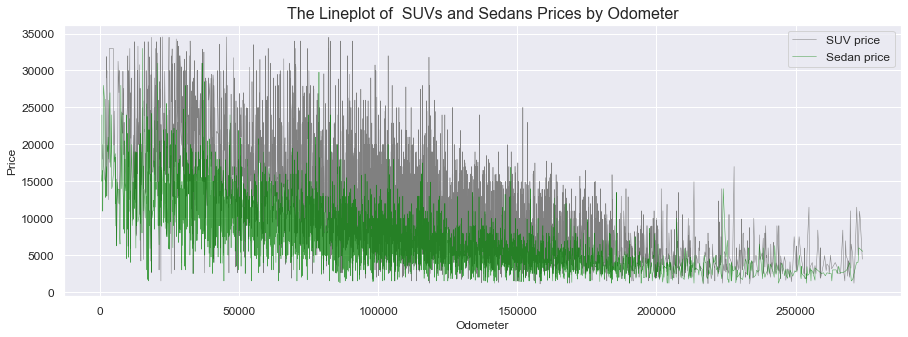

In [95]:
# studying prices of SUVs and sedans by odometer values
suv.groupby('odometer')['price'].median().\
    plot(kind='line', color='grey', linewidth=0.5, alpha=1, figsize=(15,5), fontsize=12)
sedan.groupby('odometer')['price'].median().\
    plot(kind='line', color='green', linewidth=0.5, alpha=0.7, figsize=(15,5), fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Odometer', fontsize=12)
plt.title('The Lineplot of  SUVs and Sedans Prices by Odometer', fontsize=16)
plt.legend(['SUV price', 'Sedan price'], fontsize=12);

- **the higher an odometer value, the lower a price**. That's valid **for both SUVs and sedans**.
- it's obvious, but let's mention that almost always having a similar mileage a SUV's price would be higher than a sedan's.

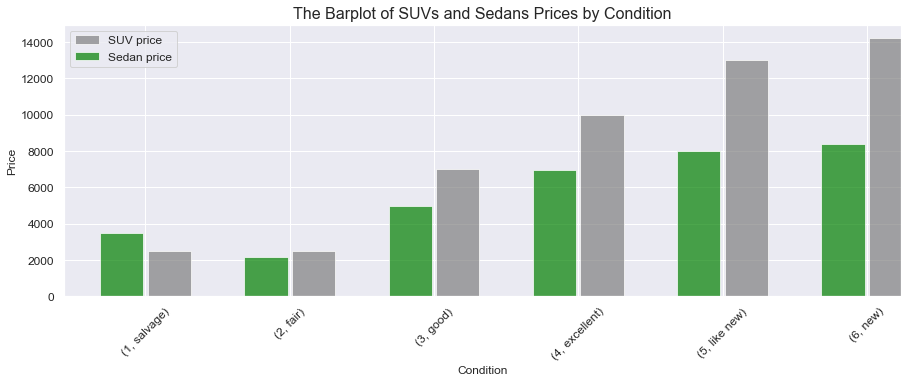

In [96]:
# studying prices of SUVs and sedans by condition
suv.groupby(['condition_calc','condition'])['price'].median().\
    plot(kind='bar', alpha=0.7, color='grey', width=0.3, position=-0.05, figsize=(15,5), fontsize=12)
sedan.groupby(['condition_calc','condition'])['price'].median().\
    plot(kind='bar', alpha=0.7, color='green', width=0.3,  position=1.05, figsize=(15,5), fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.title('The Barplot of SUVs and Sedans Prices by Condition', fontsize=16)
plt.xticks(rotation=45)
plt.legend(['SUV price', 'Sedan price'], fontsize=12);

- **in general the better car's condition the higher a price.** That's valid for both SUVs and sedans. But there is one minor exception - salvage condition, especially in case of sedans. Prices of SUVs in salvage condition are in average the same as those in fair condition. Prices of sedans in salvage condition are in average a bit higher than those in fair condition. Probably that's because of cases where spear parts of cars, sold for demolition are values higher than cars in fair condition sold for driving. Nevertheless this piece of data looks odd and is worth further investigation if needed. 
- **except of salvage, in each other condition SUVs prices are higher than sedan prices**.

In [97]:
# study of most popular vehicles conditions in ads
suv_and_sedan.groupby(['condition','type'])['price'].describe().sort_values(by='count', ascending = False)

count          mean           std     min      25%      50%  \
condition type                                                                  
excellent SUV    5722.0  11570.301468   6669.139907  1150.0  6499.00   9995.0   
          sedan  5383.0   7652.801598   3946.255861  1200.0  4792.00   6950.0   
good      sedan  3988.0   5770.302156   3212.349607  1100.0  3500.00   4995.0   
          SUV    3958.0   8747.585397   6038.500882  1100.0  4461.25   6995.0   
like new  sedan  1141.0   9127.231376   5034.078167  1150.0  5200.00   7995.0   
          SUV     970.0  14255.815464   8633.942326  1500.0  6960.00  13000.0   
fair      SUV     230.0   3274.273913   2520.085304  1095.0  1825.00   2500.0   
          sedan   193.0   2524.492228   1467.529419  1099.0  1500.00   2150.0   
new       sedan    33.0  10406.454545   6665.464050  1500.0  4999.00   8399.0   
salvage   sedan    29.0   4471.034483   2935.961871  1500.0  2700.00   3500.0   
new       SUV      14.0  15263.500000  10079.201737  3200.0  6623.75  14250.0   
salvage   SUV       8.0   5237.500000   5512.825954  1400.0  2325.00   2500.0   

                      75%      max  
condition type                      
excellent SUV    14999.00  34595.0  
          sedan   9976.00  32999.0  
good      sedan   6995.00  28500.0  
          SUV    11500.00  34555.0  
like new  sedan  12000.00  28000.0  
          SUV    20988.00  34500.0  
fair      SUV     3800.00  20500.0  
          sedan   3000.00  11000.0  
new       sedan  14500.00  28000.0  
salvage   sedan   5000.00  13500.0  
new       SUV    22749.75  30000.0  
salvage   SUV     5550.00  15000.0

- **for both SUV and sedan types the most sold vehicles are in excellent and good condition**. 
- ads with vehicles in new and salvage conditions otherwise are the rarest.

### Impact of Volor and Transmission Type on Price

These parameters are categorical, so Boxplots would be handy to study them. 

In [98]:
# first let's set that categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.
# let's check unique values and their frequency
suv['paint_color'].value_counts()
sedan['paint_color'].value_counts()

paint_color
unknown    1949
black      1890
white      1718
silver     1402
grey       1064
blue        919
red         819
green       388
brown       341
custom      261
orange       73
yellow       41
purple       37
Name: count, dtype: int64

paint_color
unknown    1914
silver     1844
black      1568
grey       1439
white      1325
blue       1120
red         836
custom      243
brown       243
green       185
purple       22
yellow       19
orange        9
Name: count, dtype: int64

- in SUV type all colors are representative except yellow and purple.
- in sedan type all colors are representative except purple, yellow and orange.
- we can't say anything concrete about "unknown" values, they could hide any colors - from the list above or not.
- black and white colors are most popular among SUVs.
- silver, black, gray, and white colors are the top four most popular colors of sedans. 

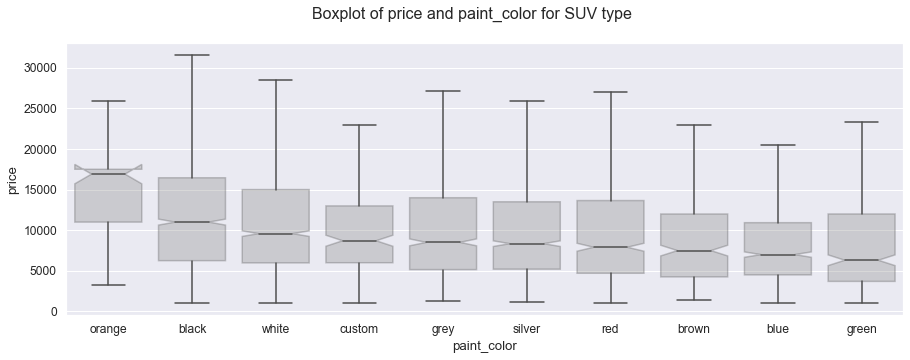

In [99]:
# building a Boxplot to study price by paint color of SUV type
suv_by_color = suv.query('paint_color not in ["yellow","purple","unknown"]')
median_order = suv_by_color.groupby('paint_color')['price'].median().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x = suv_by_color['paint_color'], 
            y = suv_by_color['price'], 
            order = median_order.index,
            notch=True, 
            color='grey', 
            boxprops=dict(alpha=0.3), 
            showfliers=False)
plt.suptitle("Boxplot of price and paint_color for SUV type", fontsize=16);

- the price ranges (without outliers) of black and white colors are top two.
- the typical orange color price (median value in current case) is the highest comparing to the other colors. Meanwhile this color was a candidate for elimination from our study, since it represents a pretty small share of all the cases (just 79 with 50 as a minimum limit).
- the typical prices (median values) of black and white -colored cars are top two after orange color. 
- the typical prices (median values) of blue and green -colored cars are the lowest. 

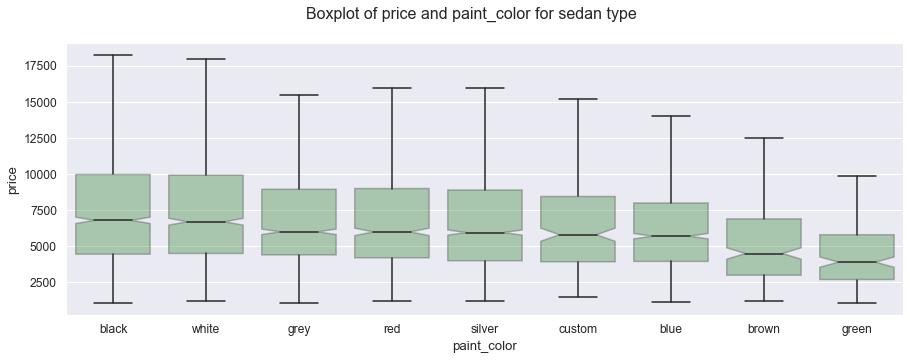

In [100]:
# building a Boxplot to study price by paint color of sedan type
sedan_by_color = sedan.query('paint_color  not in ["yellow","purple","orange","unknown"]')
median_order = sedan_by_color.groupby('paint_color')['price'].median().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x = sedan_by_color['paint_color'], 
            y=sedan_by_color['price'], 
            order=median_order.index,
            notch=True, 
            color='green', 
            boxprops=dict(alpha=0.3), 
            showfliers=False)
plt.suptitle("Boxplot of price and paint_color for sedan type", fontsize=16);

- the price ranges (without outliers) of black, red, and white colors are the top three.
- the typical prices (median values) of black and white-colored cars are the top two. 
- the typical prices (median values) of brown and green-colored cars are the lowest.
- in general, we can say that for both SUV and sedan types, black and white colors play a significant role. Such colored cars are of the most popular ones, and their prices are the top ones as well. 
- brown, blue and green colors for both types of cars mostly represent the price bottom level. 

In [101]:
# first let's set that categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.
# let's check unique values and their frequency
suv['transmission'].value_counts()
sedan['transmission'].value_counts()

transmission
automatic    10365
manual         447
other           90
Name: count, dtype: int64

transmission
automatic    10185
manual         520
other           62
Name: count, dtype: int64

- all transmission types are representative. 
- we won't take in account "other" type of transmission since it says nothing concrete for our study.
- automatic type of transmission is many times more popular than manual one for both SUV and sedan types of vehicles.

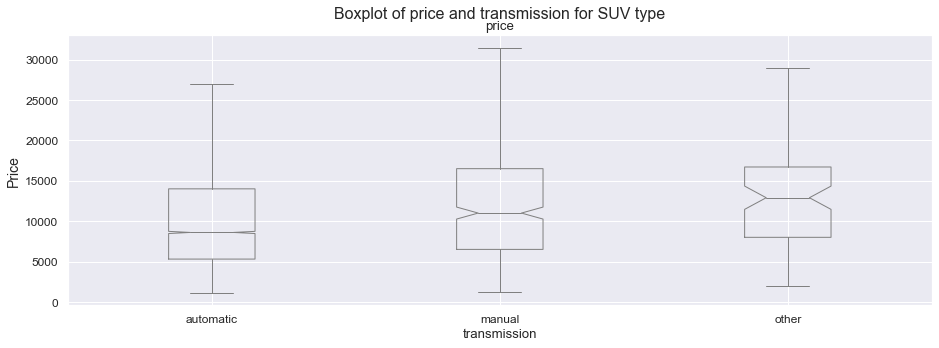

In [102]:
# building a Boxplot to study price by transmission type of SUV type
suv.boxplot(by='transmission', column='price', color='grey', figsize=(15,5), fontsize=12, notch=True, showfliers=False)
plt.suptitle("Boxplot of price and transmission for SUV type", fontsize=16)
plt.ylabel('Price', fontsize=14);

- the typical price (median value) of a vehicle with manual transmission is significantly higher comparing to the typical price of a vehicle with an automatic one. 
- the price range (without outliers) of manual transmission is notably higher comparing to the price range of an automatic one.
- the interquartile ranges (representing half of all values) of automatic and manual types are approximately of a same size.

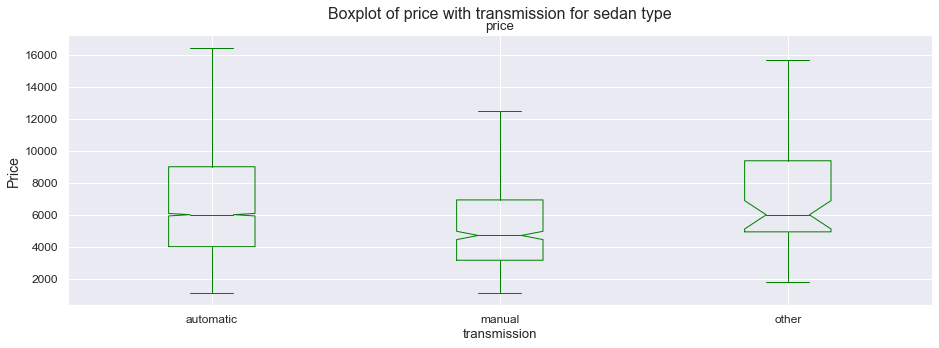

In [103]:
# building a Boxplot to study price by transmission type of sedan type
sedan.boxplot(by='transmission', column='price', color='green', figsize=(15,5), fontsize=12, notch=True, showfliers=False)
plt.suptitle("Boxplot of price with transmission for sedan type", fontsize=16)
plt.ylabel('Price', fontsize=14);

- unlike SUV case, for sedans the typical price (median value) of a vehicle with manual transmission is significantly lower than the typical price of an automatic transmission vehicle. (Probably manual transmission for SUV is usually more preferable since this type provides better handling, contrariwise for sedans - comfort provided by an automatic transmission is more preferable). 
- the price range (without outliers) of automatic transmission is notably higher comparing to the price range of an automatic one.
- the interquartile range (representing half of all values) of automatic type is significantly wider comparing to the interquartile range of manual type of transmission.

## 📝 General Conclusions <a name="general-conclusions"></a>

### Project Overview
Our analysis at Crankshaft List aimed to delve into the extensive dataset gathered from daily vehicle advertisements over recent years on the platform. The objective was to meticulously study and prepare the data, ensuring its quality and integrity, before proceeding to explore the primary factors influencing vehicle pricing.

### Data Preprocessing
During the initial phase of data preprocessing, we conducted a thorough examination using the `info()`, `describe()`, `sample()`, and `stb.missing` methods. This allowed us to assess data types, identify missing values, and gain insights into the structure of the advertisements. Subsequently, we addressed various issues, including missing values in specific fields such as `model_year`, `odometer`, and `paint_color`. Additionally, inconsistencies in data types were rectified, and minor duplicates in the names of models were fixed.

### Data Enrichment
To enrich our dataset for further analysis, we calculated and appended additional parameters such as the age of vehicles at the time of posting and the duration of ads in terms of years, months, and weekdays. This augmentation provided us with more comprehensive information for subsequent analysis, allowing for a deeper understanding of the factors influencing vehicle pricing.

### Exploratory Data Analysis
Our exploratory data analysis (EDA) involved the identification and treatment of outliers to ensure the accuracy of our analysis. We developed a systematic approach implemented in the created function, which included histogram analysis, boxplots, and descriptive statistics to detect and handle outliers effectively. By utilizing both the "1.5 * IQR" approach and the "percentile approach," we identified outliers in key parameters such as price, age, and odometer values, ultimately removing them to improve the precision of our analysis.

### 💡 Key Findings

1. **Ad Lifetime Analysis**:
   - We found that the average lifetime of an ad is a little over a month.
   - About half of all ads were removed within a period of 19 to 53 days.  
&ensp;

2. **Price Factors Analysis**:
   - There are 13 types of vehicles, with SUVs and sedans being the most popular, representing 44% of all listings.
   - SUVs and sedans have lower median prices compared to the overall median price of all vehicle types.
   - Buses are the most expensive vehicles, with a median price of approximately $29,000.
   - The number of ads varies significantly depending on the vehicle type.
   - Prices exhibit clear dependencies on factors such as vehicle age, odometer values, and condition, with notable exceptions such as salvage condition significantly affecting sedan prices.
   - Black and white vehicles command higher prices compared to other colors, especially for SUVs.
   - Manual transmission vehicles tend to have higher prices for SUVs but lower prices for sedans compared to automatic transmission vehicles.

### ❗️ Research Limitations and Further Analyses
It's essential to acknowledge the limitations of our analysis, including the potential impact of external factors such as market conditions and customer preferences. As our data covers just a year-long period of time, future research could focus on incorporating additional data sources and conducting more extensive market analysis. Additionally, further investigation could be conducted to explore the impact of factors such as sales locations and seasonality on pricing trends.

### 🎯 Summary
In conclusion, our analysis of vehicle advertisements on Crankshaft List has provided valuable insights into the factors influencing vehicle pricing. Stakeholders can make more informed decisions by utilizing these insights.